In [13]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd


In [14]:
df=pd.read_csv('../datasets/50_Startups.csv')

In [15]:
X=df[['R&D Spend','Administration','Marketing Spend']]
Y=df['Profit']

In [16]:
X=np.array(X)
Y=np.array(Y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

In [27]:
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)

SVR(kernel='linear')

In [28]:
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

In [29]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 79248641.99223568
R^2 Score: 0.9021370490446083


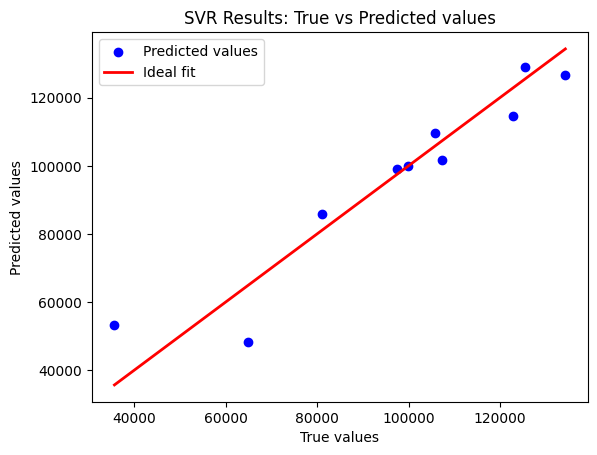

In [30]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Ideal fit')
plt.title('SVR Results: True vs Predicted values')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()